<a href="https://colab.research.google.com/github/alokranjan1203-max/project/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-churn-dataset' dataset.
Path to dataset files: /kaggle/input/customer-churn-dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR  #support vector regression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
data=pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [ ]:
data.apply(lambda x:len(x.unique()))

,0
CustomerID,440833
Age,49
Gender,3
Tenure,61
Usage Frequency,31
Support Calls,12
Payment Delay,32
Subscription Type,4
Contract Length,4
Total Spend,68364


In [ ]:
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
data.describe(include='all')

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832,440832.000000,440832.000000,440832.000000,440832.000000,440832,440832,440832.000000,440832.000000,440832.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,Standard,Annual,NaN,NaN,NaN
freq,NaN,NaN,250252,NaN,NaN,NaN,NaN,149128,177198,NaN,NaN,NaN
mean,225398.667955,39.373153,NaN,31.256336,15.807494,3.604437,12.965722,NaN,NaN,631.616223,14.480868,0.567107
std,129531.918550,12.442369,NaN,17.255727,8.586242,3.070218,8.258063,NaN,NaN,240.803001,8.596208,0.495477
min,2.000000,18.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,NaN,16.000000,9.000000,1.000000,6.000000,NaN,NaN,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,NaN,32.000000,16.000000,3.000000,12.000000,NaN,NaN,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,NaN,46.000000,23.000000,6.000000,19.000000,NaN,NaN,830.000000,22.000000,1.000000


In [ ]:
data.duplicated().any()

np.False_

In [ ]:
data.apply(lambda x:len(x.unique()))

,0
CustomerID,440833
Age,49
Gender,3
Tenure,61
Usage Frequency,31
Support Calls,12
Payment Delay,32
Subscription Type,4
Contract Length,4
Total Spend,68364


In [ ]:
cat_cols=data.select_dtypes(include='number').columns.to_list()
num_cols=data.select_dtypes(include='number').columns.to_list()
print('Categorical Columns:',cat_cols)
print('Numerical Columns:',num_cols)


Categorical Columns: ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
Numerical Columns: ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']


In [ ]:
for col in cat_cols:
  print('..................................................')
  print('Series:',col)
  print('..................................................')
  print(data[col].value_counts())
  print('\n')

..................................................
Series: CustomerID
..................................................
CustomerID
449243.0    1
449242.0    1
449241.0    1
449240.0    1
449239.0    1
           ..
6.0         1
5.0         1
4.0         1
3.0         1
2.0         1
Name: count, Length: 440832, dtype: int64


..................................................
Series: Age
..................................................
Age
50.0    13527
42.0    12578
40.0    12417
48.0    12379
47.0    12369
46.0    12368
44.0    12344
49.0    12331
41.0    12314
43.0    12298
45.0    12265
38.0    11181
31.0    11092
35.0    11062
36.0    11031
37.0    11024
33.0    10990
39.0    10961
30.0    10907
32.0    10885
34.0    10829
26.0     9692
25.0     9647
22.0     9639
28.0     9608
21.0     9574
29.0     9571
20.0     9553
23.0     9513
27.0     9472
24.0     9465
18.0     8219
19.0     8073
59.0     5573
63.0     5560
64.0     5496
55.0     5489
56.0     5477
54.0     5472
53.0  

In [ ]:
clean_data=data.copy()

In [ ]:
new_col_names = [col.lower() for col in clean_data.columns]
clean_data.columns = new_col_names
print(clean_data.columns)

Index(['customerid', 'age', 'gender', 'tenure', 'usage frequency',
       'support calls', 'payment delay', 'subscription type',
       'contract length', 'total spend', 'last interaction', 'churn'],
      dtype='object')


In [ ]:
clean_data.isna().sum()

,0
customerid,1
age,1
gender,1
tenure,1
usage frequency,1
support calls,1
payment delay,1
subscription type,1
contract length,1
total spend,1


In [ ]:
subscription_type_mode_pt=clean_data.pivot_table(values='subscription type',columns='total spend',aggfunc=(lambda x:x.mode()[0]))
subscription_type_mode_pt

total spend,100.00,100.02,100.06,100.07,100.08,100.09,100.11,100.12,100.13,100.16,...,999.91,999.92,999.93,999.94,999.95,999.96,999.97,999.98,999.99,1000.00
subscription type,Premium,Basic,Premium,Basic,Standard,Premium,Standard,Basic,Basic,Basic,...,Premium,Basic,Basic,Premium,Premium,Standard,Standard,Basic,Basic,Basic


In [ ]:
print(clean_data.columns)


Index(['customerid', 'age', 'gender', 'tenure', 'usage frequency',
       'support calls', 'payment delay', 'subscription type',
       'contract length', 'total spend', 'last interaction', 'churn'],
      dtype='object')


In [ ]:
clean_data.info()
print(clean_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customerid         440832 non-null  float64
 1   age                440832 non-null  float64
 2   gender             440832 non-null  object 
 3   tenure             440832 non-null  float64
 4   usage frequency    440832 non-null  float64
 5   support calls      440832 non-null  float64
 6   payment delay      440832 non-null  float64
 7   subscription type  440832 non-null  object 
 8   contract length    440832 non-null  object 
 9   total spend        440832 non-null  float64
 10  last interaction   440832 non-null  float64
 11  churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
customerid           1
age                  1
gender               1
tenure               1
usage frequency      1
support calls        1
payment dela

In [ ]:
#converting churn float to int64
clean_data['churn'] = clean_data['churn'].astype('Int64')
#clearing all null rows of filtered data
clean_data= clean_data.dropna(subset=['churn'])


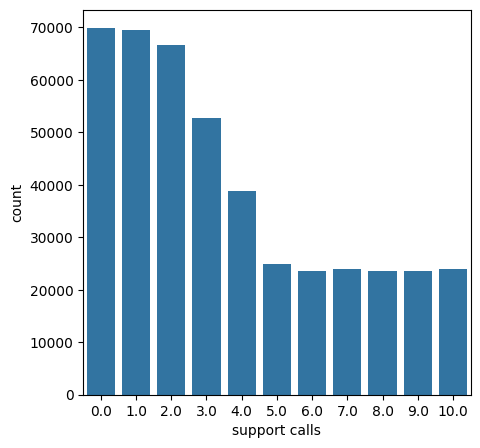

In [ ]:
#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(x='support calls',data=clean_data)
plt.show()

/tmp/ipython-input-137782197.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(labels,rotation=90)


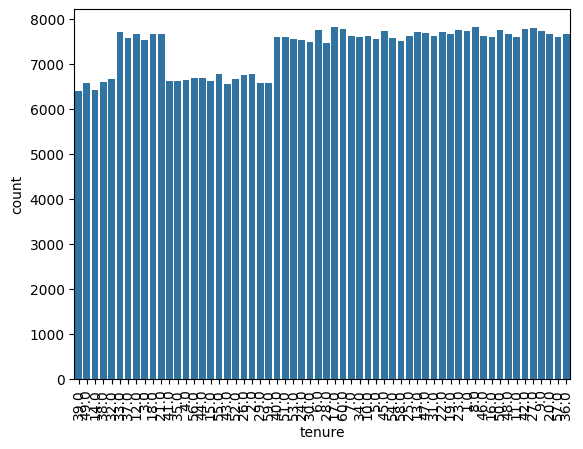

In [ ]:
#Data Visualisation
labels=list(clean_data['tenure'].unique())
chart=sns.countplot(x=clean_data['tenure'])
chart.set_xticklabels(labels,rotation=90)
plt.show()

/tmp/ipython-input-1151405241.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(labels,rotation=90)


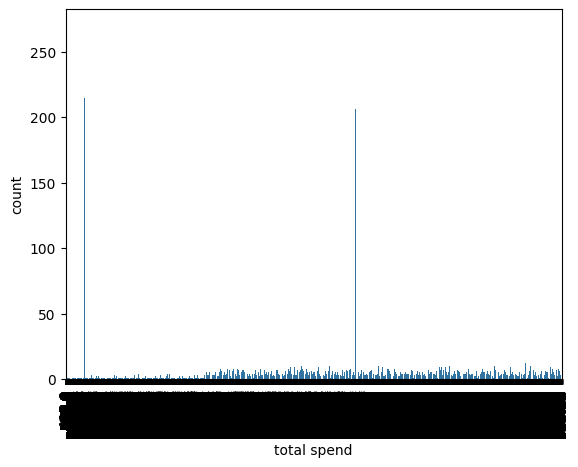

In [ ]:
#Data Visualisation
labels=list(clean_data['total spend'].unique())
chart=sns.countplot(x=clean_data['total spend'])
chart.set_xticklabels(labels,rotation=90)
plt.show()

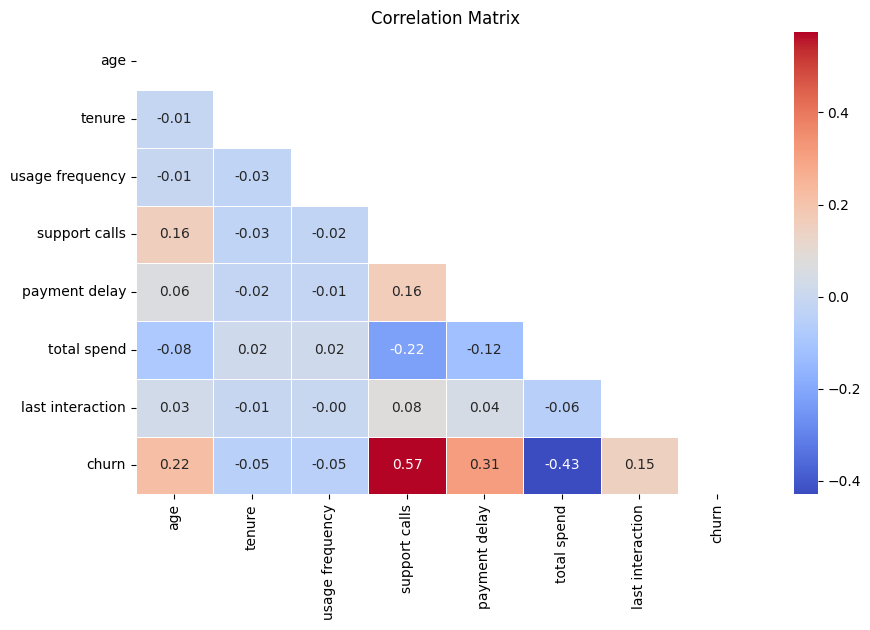

In [ ]:
clean_data['gender'] = clean_data['gender'].map({'Male': 0, 'Female': 1})
clean_data['subscription type'] = clean_data['subscription type'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})

# Create a mask to hide the diagonal
correlation_matrix = clean_data.drop(columns=['customerid','contract length','subscription type','gender']).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    mask=mask,  # Apply the mask
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
num_features = ['age', 'total spend', 'total spend', 'tenure', 'usage frequency']


# Initialize scaler
scaler = StandardScaler()
filter_data = clean_data.drop(columns=['customerid','contract length','subscription type','gender'])
# Scale selected features
filter_data[num_features] = scaler.fit_transform(filter_data[num_features])

filter_data.head()

,age,tenure,usage frequency,support calls,payment delay,total spend,last interaction,churn
0,-0.753326,0.448760,-0.210511,5.0,18.0,1.247427,17.0,1
1,2.059646,1.028278,-1.724562,10.0,8.0,-0.309865,6.0,1
2,1.255940,-1.000036,-1.375166,6.0,18.0,-1.854698,3.0,1
3,1.497051,0.390808,0.604748,7.0,7.0,-0.978462,29.0,1
4,-1.315921,0.043097,0.488282,5.0,8.0,-0.060698,20.0,1


In [ ]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X = filter_data.drop(columns=['churn'])
y = filter_data['churn']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.9735842208536074
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     38167
         1.0       1.00      0.95      0.98     50000

    accuracy                           0.97     88167
   macro avg       0.97      0.98      0.97     88167
weighted avg       0.98      0.97      0.97     88167



/tmp/ipython-input-1300011872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


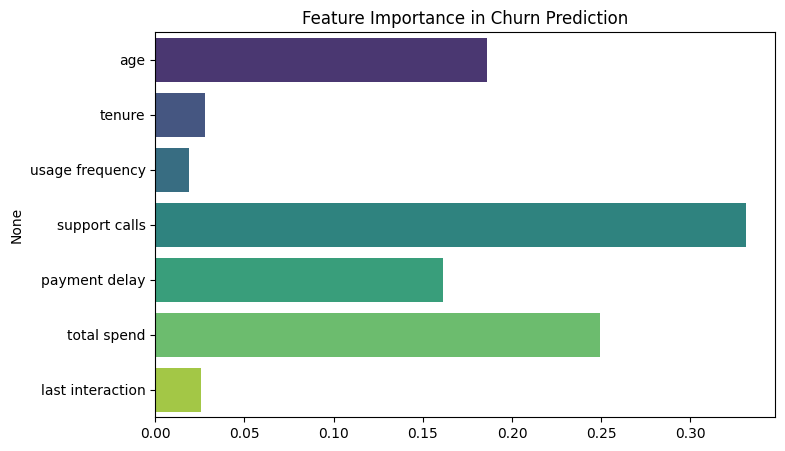

In [ ]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance in Churn Prediction")
plt.show()

In [38]:
import pickle

model_file_path = "/content/drive/MyDrive/churn_model.pkl"

with open(model_file_path, "wb") as f:
    pickle.dump(model, f)

print("Model saved to Google Drive successfully!")


Model saved to Google Drive successfully!


In [39]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [40]:
!cp churn_model.pkl /content/drive/MyDrive/


cp: cannot stat 'churn_model.pkl': No such file or directory


In [45]:
!mkdir -p /content/drive/MyDrive/Models
!cp churn_model.pkl /content/drive/MyDrive/Models/


cp: cannot stat 'churn_model.pkl': No such file or directory
